# The Physics of Sound & Digital Audio

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib widget
%load_ext autoreload
%autoreload 2
import ipytone
import ipywidgets
import numpy as np
from scipy.signal import square, sawtooth
from scipy.io import wavfile
import time
from IPython.display import display
from librosa import note_to_hz, hz_to_note

# Part I : The Fundamentals of Sound

## What *is* sound, anyway?

This might feel like a silly question -- we experience sound all the time, and have an *intuitive* notion for what it is -- but the physics of sound are surprisingly subtle! We'll begin by taking a look at how sound is produced, how it propagates thrugh air, and -- most importantly -- how we can represent it *mathematically*.

Fundamentally, sound is just a disturbance of air molecules that propagates out from a source. Think of throwing a rock into a pond: the rock disturbs the surface of the water, and the waves ripple out from the spot the rock hit the water

![pond-ripple.jpg](media/pond-ripple.jpg)

In the case of sound waves, we can't *see* the medium that's doing the rippling (the air), but if we could it would look a lot like the surface of the pond.

![spherical_sound_highlighted.gif](media/spherical_sound_highlighted.gif)

In this picture, each dot represents an air molecule. They periodically move closer together and further apart as the sound wave passes by (the sound wave *is* this movement!). Techically speaking, the wave is composed of "compressions" (air molecules bunching together), and "rarefaections" (molecules moving further apart) relative to density of still air.

The way we "see" sound waves is, of course, with our ears! Everythig you hear -- thunderclaps, speech, and symphony orchestras -- arrives as pressure waves in the air that interact with your eardrums. Without all the air molecules that make up our atmosphere, we'd be completely unable to make sound! (Hence the rather ominous saying: "In space, no one can hear you scream")

## Turning sound into math

An important way to understand and analyze sound is as a *mathematical* object, which will be the main focus of this activity (don't worry - it's a very simple function!). The fundamental building block of any audio signal (songs, speeches, etc) is the **sine wave**, which you may have learned about in your trigonometry class:
$$f(x) = \sin(x)$$

The function $\sin(x)$ is a **periodic** function, which varies between $-1$ and $1$ as the argument varies between $0$ and $2\pi$. Here's an illustration, and an introduction to some of the coding tools we'll be using in this exercise: `numpy` and `matplotlib`

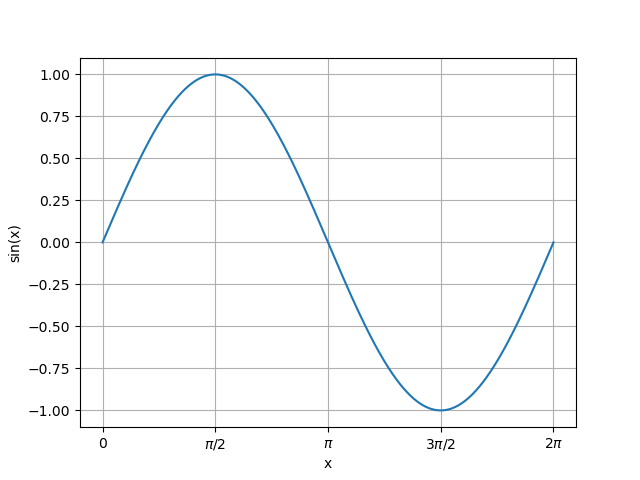

In [2]:
x = np.linspace(0,2*np.pi,1000) # generate 1000 equally spaced points between 0 and 2*pi
sinx = np.sin(x) # use numpy's built-in sine function to evaluate sin(x) at these points
plt.plot(x,sinx) # use matplotlib's "plot" funcion to plot x versus sin(x)
plt.grid()
plt.xlabel("x")
plt.ylabel("sin(x)")
xt = plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],labels=['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'2$\pi$'])

The sine fuction starts at 0 when $x=0$, and goes through one full **cycle** (increasing up to 1, decreasing to -1, and returning to 0) as $x$ increases to $2\pi$. The sine function will repeat in this fashion forever! It will look exactly the same on the interval $[2\pi,4\pi]$, $[-2\pi,0]$, and so on.

Since we're talking about sound, we will think about sine functions that vary in *time* $t$. The most generic form of a time-varying sine function can be written as
$$f(t) = A\sin(2\pi f t)$$
where $t$ is **time** (in seconds), $f$ is the **frequency** of the sine wave (in "cycles per second", also known as "Hertz (Hz)"), and $A$ is the **amplitude**.

Here is an example of how to plot this sine function:

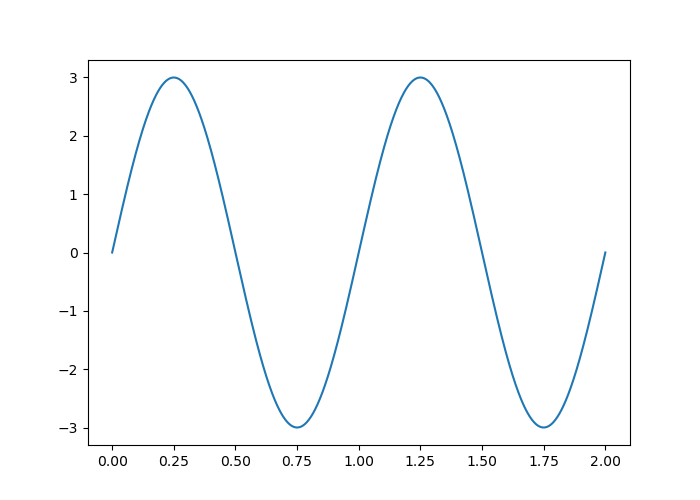

In [3]:
# Let's plot a sine function with a fixed amplitude and frequency
A = 3 # amplitude of 3
f = 1 # frequency of 4 Hz

def make_sine(t,frequency,amplitude):
    """
    This function takes in a collection of time points t, and
    outputs a sine function with a user-specified frequency and amplitude
    """
    return amplitude * np.sin(2 * np.pi * frequency * t) # this is the equation written in the cell above!

t_min, t_max = 0,2 # time range to plot. the graph will be plotted on the range [t_min,t_max]
t = np.linspace(t_min,t_max,1000) # generate 1000 equally spaced points on [t_min,t_max] to evaluate the sine function at
sint = make_sine(t,f,A) # evaluate our sine function at these time points

plt.figure(figsize=(7,5)) # make a pyplot figure
plt.plot(t,sint) # plot the sine function

To better understand how the amplitude $A$ and frequency $f$ affect the graph of the sine function, run the cell below and play with the frequency & amplitude sliders.

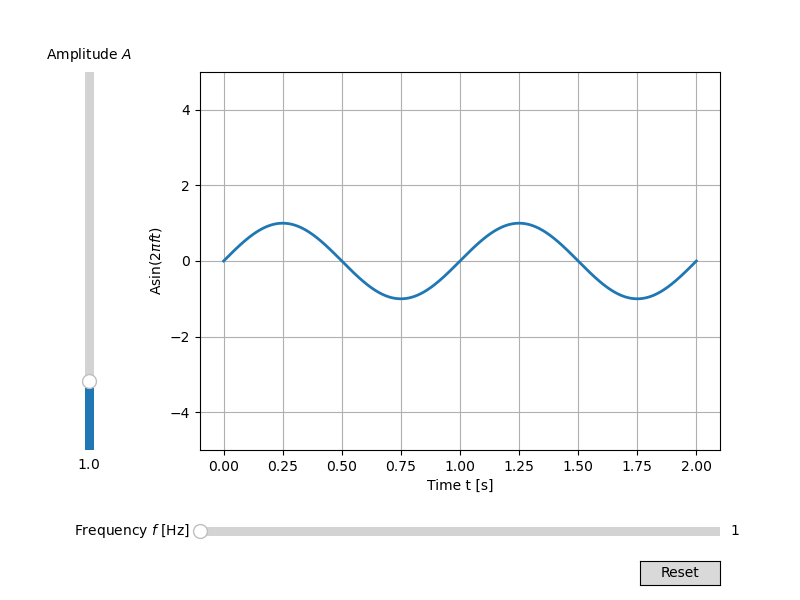

In [8]:
from helpers import interactive_sine
t_min, t_max = 0, 2
time_interval = np.linspace(t_min,t_max,1000) # 1000 equally spaced points between t_min and t_max
interactive_sine(time_interval=time_interval,
                initial_amplitude=1,
                initial_frequency=1,
                amp_max=5,
                freq_max=20)

Before we continue, make sure you understand what's going on here! Here are a few questions to get you thinking:
1. Focus on the time interval $0 < t < 1$ second. What is the relationship between the *frequency* $f$ and the behavior of the graph on this interval? We sometimes refer to frequency as "cycles per second" (Hz) -- does this name make sense?
2. How does the amplitude affect the curve? Does it have any impact on the answers to question 1?
3. **Coding**: If you increase the frequency to 20Hz, it becomes difficult to read the plot because so many oscillations are occurring per unit time. Try editing the code above so that it will plot the function on a *shorter* time interval.
4. **Coding**: The line `t = np.linspace(0,t_max,1000)` in the cell aboves defines the points where we evaluate the sine function -- in this case, 1000 equally spaced points between `t_min` and `t_max`. With the the frequency set to 20 Hz, try reducing the number of points to 100, 50, or 20. what happens to the shape of the curve? Is it still a faithful representation of the sine function?

## Hearing the math!

Now that we understand what sound *is* -- i.e. traveling waves of compression/rarefaction in air -- and we have a mathematical way to describe waves, we can unify these two and start to really understand sound! First, let's consider what a **speaker** does when it plays audio:

![speaker](media/speaker.gif)

In this gif, you can see the face of the speaker (the **diaphragm**) vibrating back and forth -- in this case, at 55 Hz. This means that if you made a graph of the horizontal position of the diaphragm as a function of time, it would look like a sine function with a frequency of 55 Hz. If we think about what the speaker's diaphragm is doing to the air molecules around it, we would see it creating pressure waves with the same frequency:

![waves-sine](media/soundInAir_withSine.gif)

So, what does this sine wave **sound** like? A single frequency sine wave corresponds to a "pure tone" -- in other words, just one note (think of playing a single key on a piano). If you play music, you probably tune your instrument to "A 440", which means a sound wave with a frequency of 440 Hz. The cell below this defines a python function called `play_tone`, which takes as arguments `frequency` (in Hz), and `duration` (in seconds). You don't need to understand all of the code - don't worry! We use the `ipytone` Python package to create an `Oscillator` object, and set its frequency to whatever you specify in the input argument. The `Oscillator` will play a pure sine tone for the `duration` that you specify. Let's give it a try!

In [9]:
def play_tone(frequency,duration=1):
    osc = ipytone.Oscillator(volume=-5)
    osc.frequency.value = frequency
    osc.connect(ipytone.destination)
    osc.start().stop(f"+{duration}")
    time.sleep(duration)
    osc.disconnect(ipytone.destination)
    osc.dispose()
    del osc

In [10]:
# Play an "A 440" - i.e. a 440 Hz sine wave -- for a duration of 1 second
play_tone(440,duration=1)

Now, try changing the frequency to something other that 440 and re-running the cell above. Here's some food for thought:
1. What happens to the sound if you *increase* the frequency from 440 Hz? What about if you *decrease* it? How does the frequency correspond to our intuitive ideas about "low pitched sound" and "high pitched sound"?
2. Try playing a tone that is an *integer multiple or fraction* of 440 -- for example $880 = 2 \times 440$ or $210 = 440/2$. How does it sound relative to the 440 Hz tone? In music theory, we call these multiples **octaves**. An 880 Hz note is the "same note" as 440 Hz -- i.e. an A -- but shifted up by an octave

## Stacking tones together -- chords!

So far, we've only been considering single-frequency sine waves -- playing one note on a keyboard. As you know, we can also play multiple keys at the same time to make **chords**. To represent a chord mathematically, all we have to do is **sum the sine waves together**! For example, we can represent a chord with two frequencies $f_1$ and $f_2$ as:

$$ f_\mathrm{chord}(t) = A_1\sin(2\pi f_1 t) + A_2\sin(2\pi f_2 t) $$

Let's have a look at the graph of a two-note chord

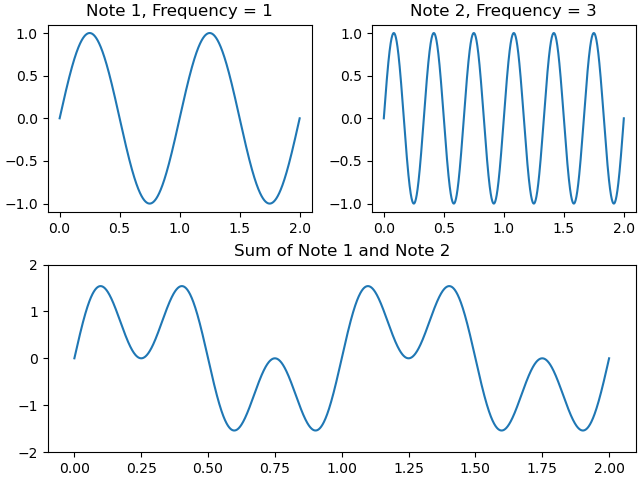

Output()

In [11]:
t = np.linspace(0,2,2000)
freq_1 = 1
freq_2 = 3
chord_1 = np.sin(2 * np.pi * freq_1 * t)
chord_2 = np.sin(2 * np.pi * freq_2 * t)

fig = plt.figure(layout='constrained')
gs = GridSpec(2, 2, figure=fig, height_ratios=[1,1])

ax1 = fig.add_subplot(gs[0,0])
l1, = ax1.plot(t,chord_1)
ax1.set_title(f"Note 1, Frequency = {freq_1}")

ax2 = fig.add_subplot(gs[0,1])
l2, = ax2.plot(t,chord_2)
ax2.set_title(f"Note 2, Frequency = {freq_2}")

ax3 = fig.add_subplot(gs[1,:])
l3, = ax3.plot(t,chord_1+chord_2)
ax3.set_title("Sum of Note 1 and Note 2")
ax3.set_ylim([-2,2])

plt.show()

def change_freqs(f1,f2):
    chord_1 = np.sin(2 * np.pi * f1 * t)
    chord_2 = np.sin(2 * np.pi * f2 * t)
    l1.set_ydata(chord_1)
    ax1.set_title(f"Note 1, Frequency = {f1}")
    l2.set_ydata(chord_2)
    ax2.set_title(f"Note 2, Frequency = {f2}")
    l3.set_ydata(chord_1+chord_2)
    plt.draw()

s1 = ipywidgets.IntSlider(value=freq_1,min=1,max=20,step=1,description="Frequency 1",disabled=False)
s2 = ipywidgets.IntSlider(value=freq_2,min=0,max=20,step=1,description="Frequency 2",disabled=False)
act = ipywidgets.interactive(change_freqs,f1=s1,f2=s2)
display(ipywidgets.HBox(act.children[:-1]))
display(act.children[-1])#Show the output

There's a lot of interesting stuff going on here! Play around with the sliders above, and think about these questions:
1. Using different settings for frequency 1 and frequency 2, study the waveform closely. Is it also a periodic signal?
2. If you fix frequency 1 to be 1 Hz and vary frequency 2, what is the period of the resulting waveform?
3. If you fix frequency 1 at 1 Hz and make frequency 2 large (20 Hz, for example), do you notice any interesting structure in the output waveform?

Now, let's see what a more complex chord looks and sounds like! We'll consider an A major chord, which consists of the notes A, C&#9839;, E, and A (one octave higher). The frequencies of these notes are 440, 554.37, 659.25, and 880 Hz, respectively (note that the high A is double the frequency of the low A!).

We first define a function called `play_chord`, whose arguments are:
- `notes` : a list of notes that will be in the chord. These can be frequencies (numbers), or a string that specifies which note you want. For example, a 440 Hz A note could be represented as `440`, or as `"A4"`
- `duration` : the duration of the chord, in seconds

This function creates a `PolySynth` object from the `ipytone` library, which is just a synthesizer that can play multiple notes at a time. We then use the `trigger_attack_release` function to specify which notes to play and for how long (the `notes` and `duration` argument)

In [12]:
def play_chord(notes,duration):
    psynth = ipytone.PolySynth(voice=ipytone.Synth, volume=-8).to_destination()
    psynth.trigger_attack_release(notes, duration)
    time.sleep(duration)
    psynth.disconnect(ipytone.destination)
    psynth.dispose()
    del psynth

Now that we have a function to play any chord we want, we can try it out:

In [14]:
A_major_frequencies = [440,554.37,659.25,880] # the frequencies of an A major chord
A_major_notes = ["A4","C#5","E5","A5"] # we can also represent the A major chord in terms of the notes

# play it using the frequencies
play_chord(A_major_frequencies,duration=2)

In [16]:
# play it using the notes
play_chord(A_major_notes,duration=2)

Now, try it out for yourself! If you know some music theory, put in a chord that you know. If not, just copy the A major frequencies from above and try messing with them!

In [18]:
# Put your chord here!
my_chord = [] # put your chord frequencies or note names in this list, separated by commas
duration = 2 # change the duration if you want
play_chord(my_chord,duration=duration)

We can also plot these chords to get an idea of what the underlying waveform looks like. Below, we define a function called `plot_chord`, which takes as arguments:
 - `notes` : the notes you want to put in the chord (can be frequencies or note names)
This function will only show the chord in the time interval $[0,0.02]$ seconds. This is because typical musical notes are several hundred Hz (cycles per second), so in order to see a few cycles we only need to plot the graph for a fraction of a second

In [19]:
from helpers import sine_function
def plot_chord(notes):
    t = np.linspace(0,0.02,1000)
    sines = []
    note_names = []
    for note in notes:
        if type(note) == str:
            freq = note_to_hz(note)
            note_names.append(note)
        else:
            freq = float(note)
            note_names.append(hz_to_note(note))
        sines.append(sine_function(t,freq,amp=1))
    tot_sine = sum(sines)
    plt.ioff()
    fig = plt.figure(figsize=(8,6))
    plt.plot(t,tot_sine)
    plt.xlabel("Time [s]")
    plt.ylabel("Chord Amplitude")
    plt.title("Notes in chord: "+", ".join(note_names))
    display(fig)
    plt.ion()

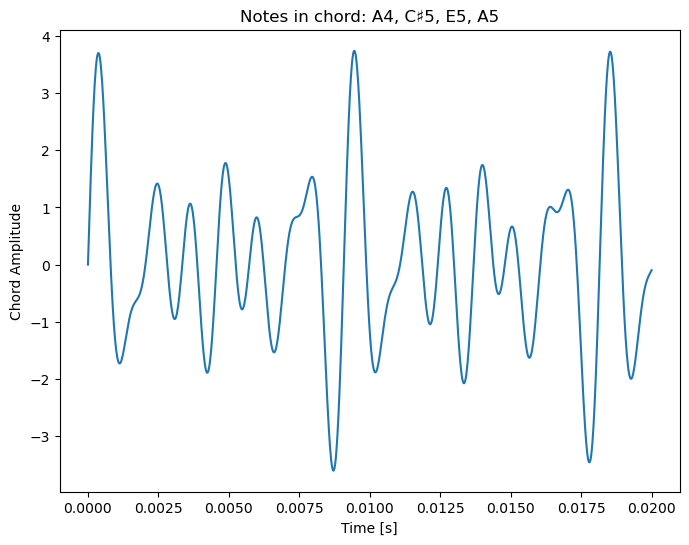

In [20]:
plot_chord(A_major_frequencies)

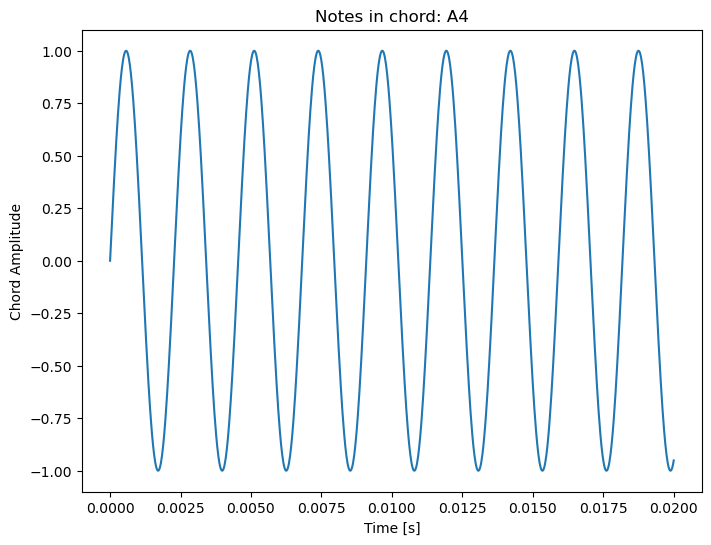

In [21]:
# Now try it for yourself!
my_chord = ['A4'] # edit this!
plot_chord(my_chord)

## Beyond the sine wave
So far, we've been talking exclusively about *sine waves*. We've learned that a sine wave is a periodic function that repeats over a time interval determined by its *frequency* $f$. You might be wondering : **why does it have to be a sine wave?**

As it turns out, it doesn't just have to be a sine wave! Sine waves are particularly nice, because the tone they produce when played is very clean and clear, and it's easy to write down a mathematical expression for them. In general, however, we can think about *any* periodic function -- it just has to repeat itself with some frequency $f$. Here are the most common kinds of waveform that you might encounter in music (most commonly, electronic music):

![waveforms](media/soundwave_types.jpg)

To get a feel for these new types of waves, run the cell below and use the dropdown menu to switch between them. You should see very similar behavior to the sine wave case, just with different shapes!

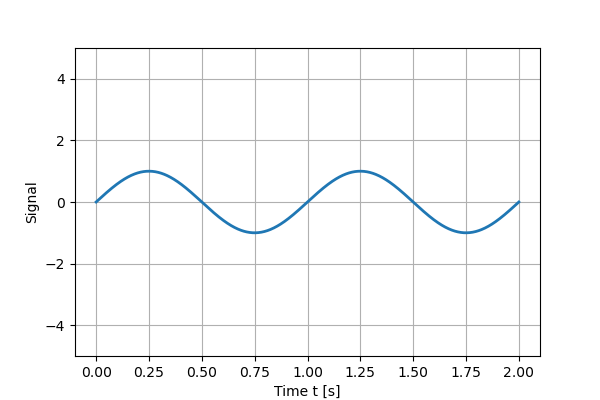

Output()

In [22]:
from helpers import interactive_wave
interval = np.linspace(0,2,1000)
interactive_wave(time_interval=interval,
                initial_amplitude=1,
                initial_frequency=1,
                amp_max=5,
                freq_max=20)

These waves look significantly different to a sine wave -- they sound different, too! Run the cell below and try out the different wave types to see what they sound like.

In [23]:
from helpers import oscillator_sampler
oscillator_sampler()

Some food for thought:
1. Try playing the square wave. You might notice that it seems **louder** than the sine wave. Can you figure out why? **Hint**: the *amplitude* of a wave -- i.e. the value of the wave graph at any given time -- determines how loud it sounds. All the waves (sine, square, triangle, etc.) have the same *peak amplitude* (minimum/maximum amplitude per cycle), but they don't all spend the same amount of time at their peak amplitude. What's different in the square wave versus the sine wave?
2. Which wave sounds the most similar to a pure sine wave? Look at its graph in the interactive cell above. Does it make sense why it sounds so similar to a sine wave?
3. Switch between the sine wave and the square wave a few times. If you listen closely, you can hear the pure sine tone "hiding" inside the square wave tone. This is a very interesting -- and mathematically profound! We'll briefly talk about this in the next section

## Going crazy with chords!
When we plotted chords earlier (e.g. A major), we saw that the graphs can get pretty complicated and very "wiggly" when we add lots of sine waves together with different frequencies. If we choose the frequencies of these sine waves *very carefully*, we can make them sum up to get whatever graph we want! This might sound hard to believe, but it's possible to prove it mathematically. We won't go into any details here, but these special sums of sine waves are called **Fourier series** (named after the 18th/19th century mathematician Joseph Fourier). 

The key idea is this: for any **periodic** function (such as a square wave, triangle wave, etc.), we can make that function by summing up an infinite number of sine waves with very carefully chosen frequencies. For example, we can make a square wave like this:
$$ \mathrm{Square}(t) = a_1\sin(1\pi t) + a_3 \sin(3 \pi t) + a_5\sin(5 \pi t) + \cdots$$
where $a_1$, $a_3$, $a_5$ etc. are specially chosen numbers that make this work. In principle, there are infinitely many terms in this sum, and we sum over odd-numbered frequencies $1$, $3$, $5$ etc.

This looks quite complicated! Don't worry too much about the math... To get an intuitive feeling for how this works, run the code cell below this. You can select which wave type you want (sine, square, triangle, sawtooth), and how many sine waves you want to sum up in the Fourier series that makes that waveform. As you increase the number of terms, you'll notice that the graph comes closer and closer to resembling the true waveform!

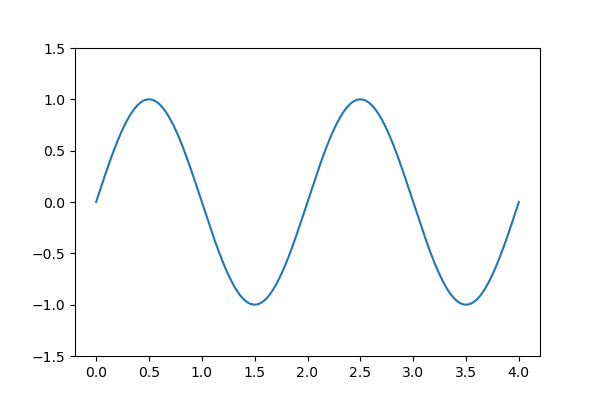

In [24]:
from helpers import fourier_sandbox
fourier_sandbox()

## A little bit of fun
Phew, that was a lot of math! Don't worry if it seemed confusing -- this is very complicated, college-level stuff (and a great reason to take more math classes in college!). As a synthesis of everything we've learned so far, run the cell below to play with a four-note, customizable chord generator. For each note, you can select the frequency, wave type, and volume (and toggle them on or off using Start/Stop). It's programmed to play an A major chord by default, but have fun with it!

In [25]:
from helpers import quad_oscillator
quad_oscillator()

Here are some interesting questions to think about:
1. Turn on only the first two notes, and set them to different but nearby frequencies (e.g. 440 and 442 Hz). What do you hear? The notes should sound a little bit out of tune, and there should be a low-frequency "wah-wah-wah-wah" sound accompanying them. This is called the **beat frequency**, and you often hear it in live music if two instruments are playing the same note but are slightly out of tune with each other. For example, a 440 Hz and 442 Hz tone differ by a frequency of 2 Hz, so you will hear a "wah-wah-wah" beat at a frequency of 2 Hz!

# Part II : Sound in the real world

So far, we've been discussing sound in a very theoretical way -- as sine waves, square waves, etc. that we can describe using math. This is a nice way to discuss it, but it begs the question: **why are we focusing so much on sine waves? How do we know that a sine wave is the right way to describe sounds in the real world?** The answer to this question gets to the heart of a lot of really interesting physics...

## A mass on a spring
One of the simplest physical systems you can analyze -- and which will probably appear in your first physics course -- is a **simple harmonic oscillator**. This is just a very fancy way of saying **a mass on a spring**. It looks like this : 

![mass-spring](media/mass-spring.gif)

The hallmark of a mass-spring system is its **linear restoring force**. This means that if we stretch or compress the spring by some distance $x$ away from its resting (unstretched) length, it will pull or push back on us with a **restoring force** that is directly proportional to how much we stretched it. In math language, this means:
$$F_\mathrm{restoring}(x) = kx$$
where $k$ is just a constant number that describes how "hard" the spring pushes back (large $k$ is a very stiff spring, and small $k$ is a very loose one).

If we attach an object to the end of this spring, compress it a little bit, and then let go, the object will **oscillate**. This motion can be described with -- you guessed it -- a sine wave! Here's an illustration : 

![mass-spring-sine](media/MassSpring_withSine.gif)

If we let this system go, it will oscillate like this *forever*! That's not very realistic, though... In real life, it would gradually slow down and come to a stop. This is called **damping**. Damping happens whenever the mass-spring system loses energy to the outside world -- for example, the mass is moving around in air and bumping into air molecules. These molecules will gradually steal energy from the mass and slow it down. A better way to visualize damping is by thinking of the mass as moving through some kind of thick or gloopy medium, such as water : 

![mass-spring-water](media/damped_oscillator.webp)

In this picture, the plunger attached to the mass will move through the water as the mass oscillates. The **drag** due to the water will gradually slow the whole system down.

Let's have a look at how damping effects the shape of a sine wave. Run the cell below, and using the "damping" slider to control how strongly the sine wave oscillations are damped. Damping will start at 0, which corresponds to a completely normal sine wave. As you increase it above zero, you should notice some changes

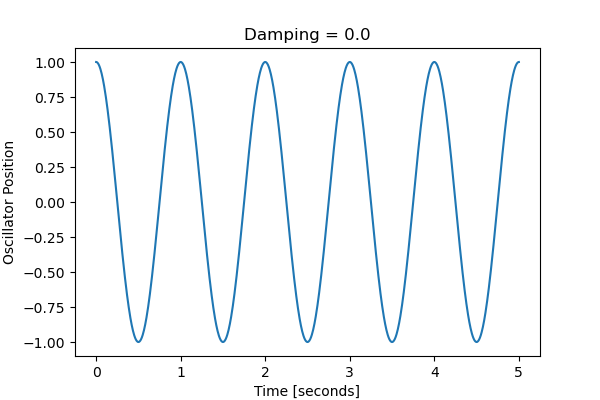

In [44]:
from helpers import interactive_sho
interactive_sho()

Pause, and consider these questions:
1. Set the damping to a small value (0.5, for example). What is happening to the **amplitude** of the sine wave as time passes? Does the term "damping" make sense given this behavior?
2. Think about sound from musical instruments -- strumming a guitar string, for example. The sound starts off loud, and gradually softens until the string vibrating. This is a real-world realization of damping! The string is oscillating back and forth in a sine wave pattern, and damping (due to energy loss to the body of the guitar) gradually reduces its amplitude until it comes to a complete stop.
3. Set the damping to a very large value (8, for example). Are there any oscillations at all? This is called the "overdamping", and it happens when the medium is very, very thick and resists motion very strongly. Think of a mass & spring immersed in a bowl of molasses - it would hardly move at all!

## Oscillators and the real world

The harmonic oscillator is a very simple physical system, but it can be generalized to an extremely large range of real-life scenarios! Generally speaking, whenever an object is "springy" -- i.e. it pushes back on you directly proportional to how hard you push on it -- it will undergo simple harmonic motion! This is how many musical instruments work, particularly stringed instruments. 

A very popular and relatively accurate model of how atoms in a solid move uses the simple harmonic oscillator. You can imagine the atoms in a solid as being attached to one another with tiny little springs, like this picture shows:

![einstein-solid](media/einstein_solid.gif)

If you imagine smacking the top of this cube with your hand, you would displace the nearby atoms a little bit from their equilibrium positions. Since they're connected together by springs, they will undergo simple harmonic motion after you displace them. This is how we get sine waves in the real world!

# Part III: Sound on the computer : digital audio!

In [1]:
def minmax_scale(x):
    xmin = np.min(x)
    xmax = np.max(x)
    x = (x-xmin)/(xmax-xmin) # scale to [0,1]
    x = x-0.5 # scale to [-0.5,0.5]
    x = 2*x # scale to [-1,1]
    return x

# Custom Notes

In [82]:
sample_rate = 44100
duration = 5
frequency = 440

size = int(sample_rate * duration)

factor = frequency * np.pi * 2 / sample_rate
waveform = np.sin(np.arange(size) * factor)

In [84]:
down_rate = 44100/sample_rate

buff = ipytone.AudioBuffer(url_or_array=waveform)
player = ipytone.Player(buff).to_destination()

player.playback_rate = 1/down_rate
player.start().stop("+2")

Player()

In [85]:
buff.dispose()
player.dispose()

Player(disposed=True)

In [125]:
rate,data = wavfile.read('gould.wav')
num_secs = 3.88
samps = int(rate*num_secs)
offset = 48000
audio = data[offset:offset+samps]

downsample = 4
subsample = audio[::downsample][:,0]
new_rate = rate//downsample

down_rate = 44100/new_rate
subsample = minmax_scale(subsample)
buff = ipytone.AudioBuffer(url_or_array=subsample.astype(np.float32))
player = ipytone.Player(buff).to_destination()
player.playback_rate = 1/down_rate
player.start().stop("+4")

Player()

In [101]:
buff.dispose()
player.dispose()

Player(disposed=True)

In [111]:
new_rate

171098.0